#Association Rules
Let's say you are a machine learning engineer working for a clothing company and you want to adopt new strategies to improve the company's profit.

Use this dataset and the association rules mining to find new marketing plans.

Note that one of the strategies can be based on which items should be put together

dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

Bonus: Try to do some visualization before applying the Apriori algorithm.

Let's do the same checkpoint but with a bigger dataset!

In [16]:
import plotly.express as px
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
# import warnings

# Sample dataset
samp_dataset = [
    ['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],
    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],
    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],
    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],
    ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']
]

# Flatten the dataset to a list of items
flat_dataset = [item for transaction in samp_dataset for item in transaction]

# Calc the freq of each item
item_counts = pd.Series(flat_dataset).value_counts().reset_index()
item_counts.columns = ['Items', 'Frequency']

# VIZ
fig = px.bar(item_counts, x='Items', y='Frequency', title='Item Frequency in the Sample Dataset', labels={'Frequency': 'Count'})
fig.show()

# warnings.filterwarnings("ignore", category=DeprecationWarning)

In [37]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convert the dataset into a transaction format
te = TransactionEncoder()
te_ary = te.fit(samp_dataset).transform(samp_dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [39]:
# Applying the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Dress),(Heels),0.4,0.4,0.4,1.0,2.50,0.24,inf,1.000000
1,(Heels),(Dress),0.4,0.4,0.4,1.0,2.50,0.24,inf,1.000000
2,(Necklace),(Dress),0.2,0.4,0.2,1.0,2.50,0.12,inf,0.750000
3,(Sandals),(Dress),0.2,0.4,0.2,1.0,2.50,0.12,inf,0.750000
4,(Dress),(Scarf),0.4,0.8,0.4,1.0,1.25,0.08,inf,0.333333
...,...,...,...,...,...,...,...,...,...,...
670,"(Necklace, Scarf)","(Dress, Earrings, Hat, Heels)",0.2,0.2,0.2,1.0,5.00,0.16,inf,1.000000
671,"(Necklace, Heels)","(Dress, Earrings, Hat, Scarf)",0.2,0.2,0.2,1.0,5.00,0.16,inf,1.000000
672,"(Hat, Necklace)","(Dress, Earrings, Scarf, Heels)",0.2,0.2,0.2,1.0,5.00,0.16,inf,1.000000
673,"(Hat, Heels)","(Dress, Earrings, Necklace, Scarf)",0.2,0.2,0.2,1.0,5.00,0.16,inf,1.000000


from matplotlib import pyplot as plt
rules['antecedent support'].plot(kind='hist', bins=20, title='antecedent support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rules['consequent support'].plot(kind='hist', bins=20, title='consequent support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rules['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rules['confidence'].plot(kind='hist', bins=20, title='confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rules.plot(kind='scatter', x='antecedent support', y='consequent support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rules.plot(kind='scatter', x='consequent support', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rules.plot(kind='scatter', x='support', y='confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rules.plot(kind='scatter', x='confidence', y='lift', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
rules['antecedent support'].plot(kind='line', figsize=(8, 4), title='antecedent support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rules['consequent support'].plot(kind='line', figsize=(8, 4), title='consequent support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rules['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
rules['confidence'].plot(kind='line', figsize=(8, 4), title='confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

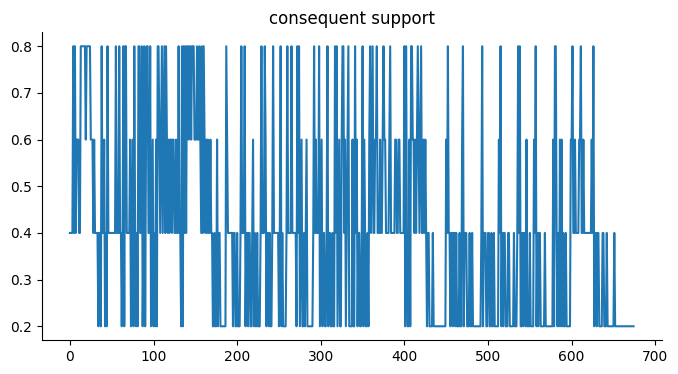

In [36]:
from matplotlib import pyplot as plt
rules['consequent support'].plot(kind='line', figsize=(8, 4), title='consequent support')
plt.gca().spines[['top', 'right']].set_visible(False)

#ONTO THE CHECKPOINT

In [ ]:
import pandas as pd
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample dataset
dataset = [
    ['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'],
    ['burgers', 'meatballs', 'eggs'],
    ['chutney'],
    ['turkey', 'avocado'],
    # ... (remaining transactions)
    ['mineral water', 'eggs', 'chicken', 'chocolate', 'french fries']
]

# Flatten the dataset to a list of items
flat_dataset = [item for transaction in dataset for item in transaction]

# Calculate the frequency of each item
item_counts = pd.Series(flat_dataset).value_counts().reset_index()
item_counts.columns = ['Items', 'Frequency']

# Create a bar chart using Plotly Express
fig = px.bar(item_counts, x='Items', y='Frequency', title='Item Frequency in the Dataset', labels={'Frequency': 'Count'})
fig.show()

# Convert the dataset into a transaction format
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the association rules
rules

In [ ]:
/content/drive/MyDrive/Colab Notebooks/Market_Basket_Optimisation.csv

In [ ]:
import pandas as pd
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Read the data from a CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Market_Basket_Optimisation.csv'
df = pd.read_csv(file_path)

# Convert the DataFrame into a list of transactions
transactions = df.values.tolist()

# Flatten the dataset to a list of items
flat_dataset = [item for transaction in transactions for item in transaction]

# Calculate the frequency of each item
item_counts = pd.Series(flat_dataset).value_counts().reset_index()
item_counts.columns = ['Items', 'Frequency']

# Create a bar chart using Plotly Express
fig = px.bar(item_counts, x='Items', y='Frequency', title='Item Frequency in the Dataset', labels={'Frequency': 'Count'})
fig.show()

In [6]:
# Convert all columns to string
df = df.applymap(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [9]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



shrimp               object
almonds              object
avocado              object
vegetables mix       object
green grapes         object
whole weat flour     object
yams                 object
cottage cheese       object
energy drink         object
tomato juice         object
low fat yogurt       object
green tea            object
honey                object
salad                object
mineral water        object
salmon               object
antioxydant juice    object
frozen smoothie      object
spinach              object
olive oil            object
dtype: object

In [10]:
# Convert the dataset into a transaction format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the association rules
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



TypeError: ignored